 # Disease Prediction from Medical Data

Target labels: ['malignant' 'benign']

Logistic Regression Accuracy: 0.9737
              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


SVM Accuracy: 0.9825
              precision    recall  f1-score   support

   malignant       1.00      0.95      0.98        43
      benign       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Random Forest Accuracy: 0.9649
              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       11

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:19:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 0.9561
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        43
      benign       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



/tmp/ipython-input-1-900771053.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='mako')


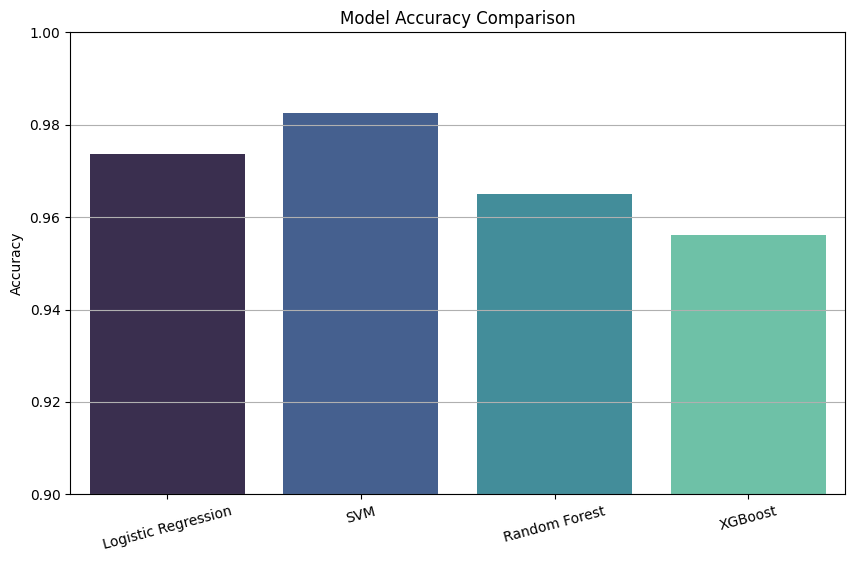

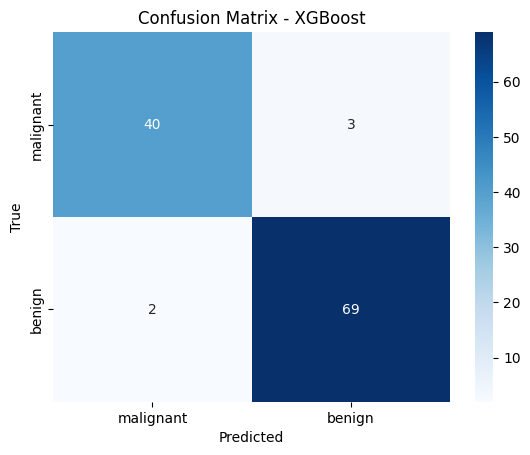

In [ ]:
# Step 1: Install necessary packages
!pip install xgboost seaborn scikit-learn --quiet

# Step 2: Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Step 3: Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
print(f"Target labels: {data.target_names}")

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Step 7: Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=data.target_names))

# Step 8: Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='mako')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.90, 1.0)
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.show()

# Step 9: Confusion Matrix for best model (XGBoost example)
best_model = models["XGBoost"]
y_pred = best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
